<a href="https://colab.research.google.com/github/Masciel-Sevilla/Segmentacion/blob/main/AnalisisExtraSmall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Paso 1: Descomprimir el dataset (esto solo se hace una vez)
import os
import zipfile

zip_path = '/content/Balanced.zip'
extract_path = '/content/'

# Solo descomprimir si no se ha hecho antes
if not os.path.exists(os.path.join(extract_path, 'Balanced')):
    print(f"Descomprimiendo {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("¡Descompresión completada!")
else:
    print("La carpeta 'Balanced' ya existe. Omitiendo descompresión.")

Descomprimiendo /content/Balanced.zip...
¡Descompresión completada!


🔬 ANÁLISIS EN PROFUNDIDAD DE IMÁGENES SELECCIONADAS (MODELO S)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'aspp_module', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


✅ Modelo 'efficient_weed_model_S_best.keras' cargado exitosamente.

▶️  Iniciando análisis para 6 imagen(es) seleccionada(s)...



/tmp/ipython-input-2889150923.py:193: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-2889150923.py:193: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-2889150923.py:193: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-2889150923.py:193: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-2889150923.py:193: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.ca

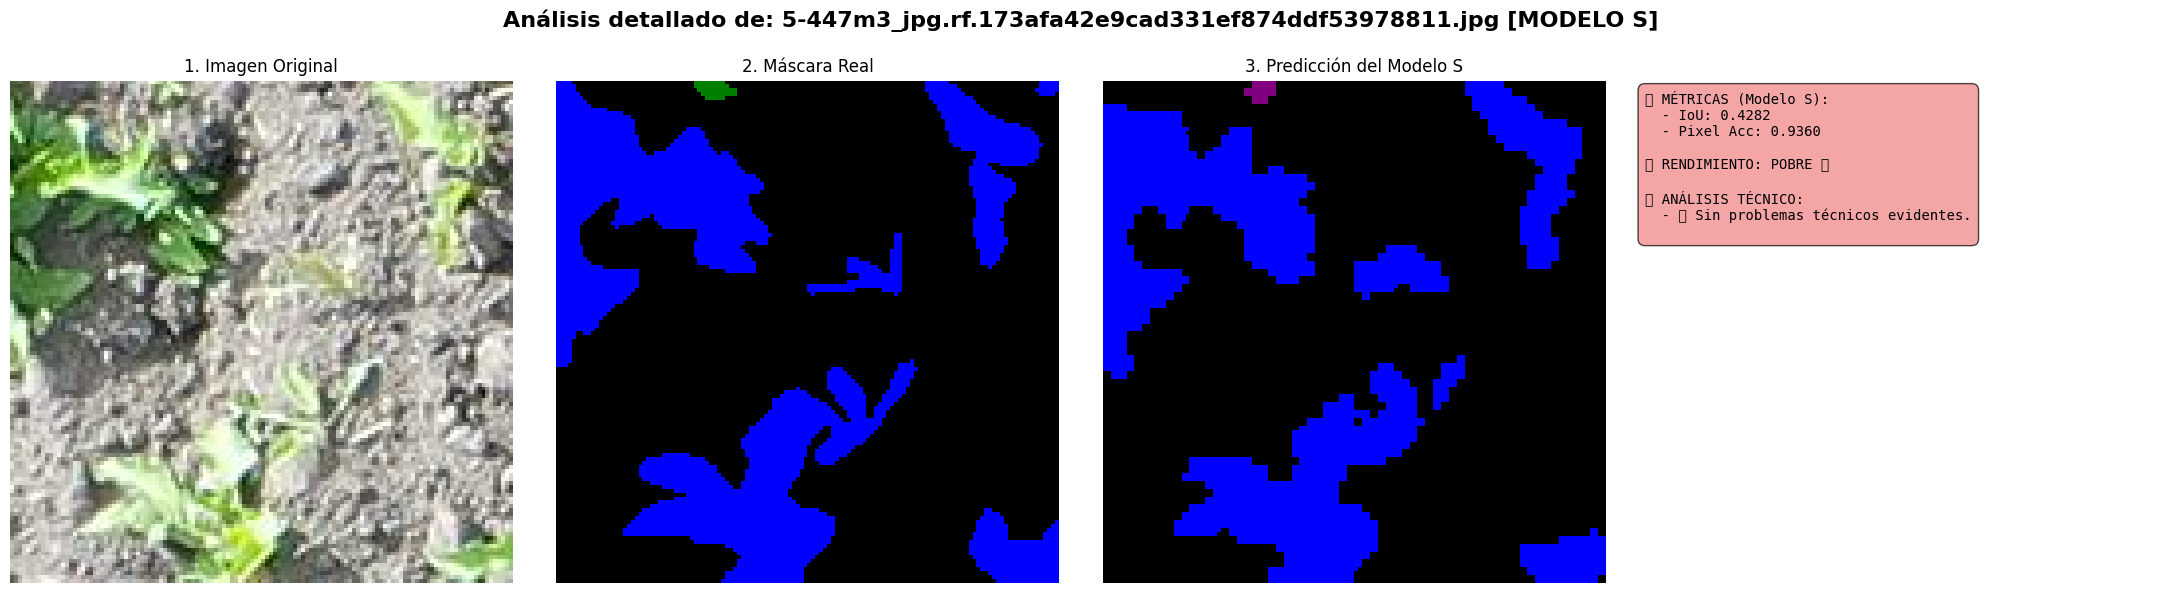

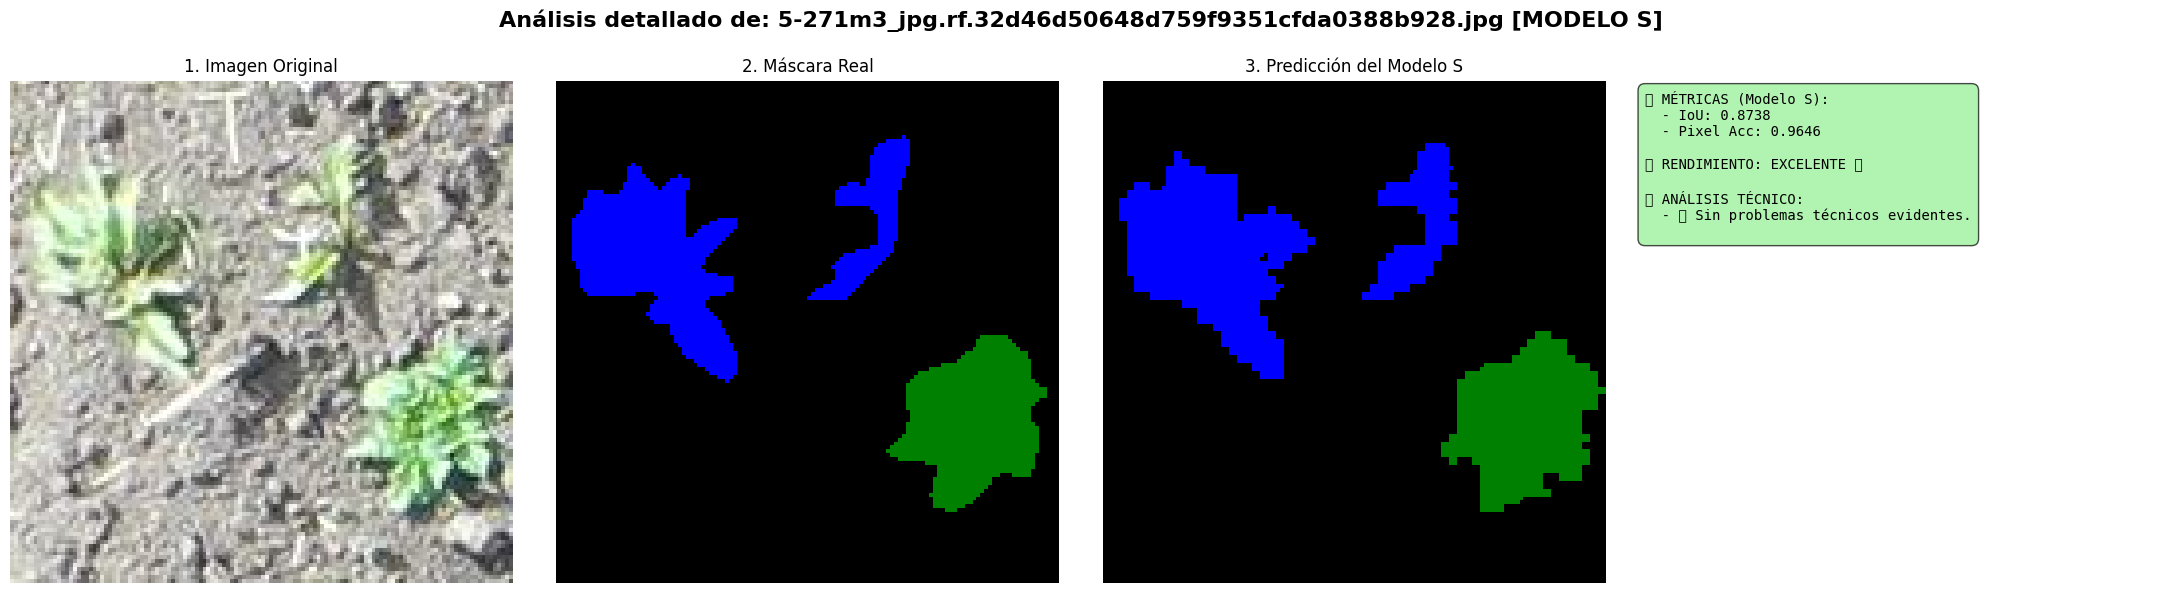

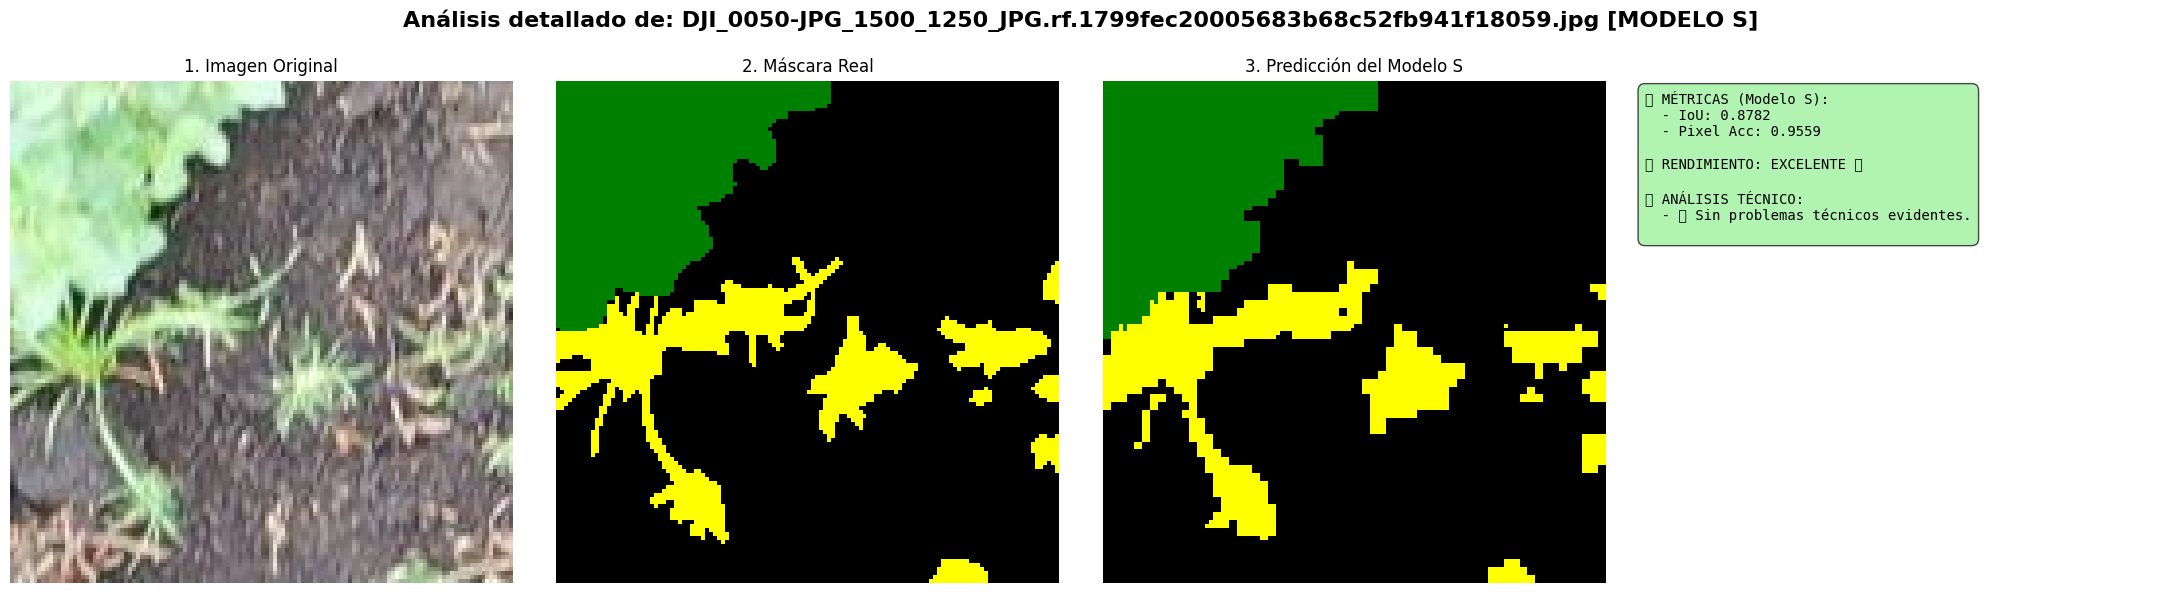

/tmp/ipython-input-2889150923.py:193: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


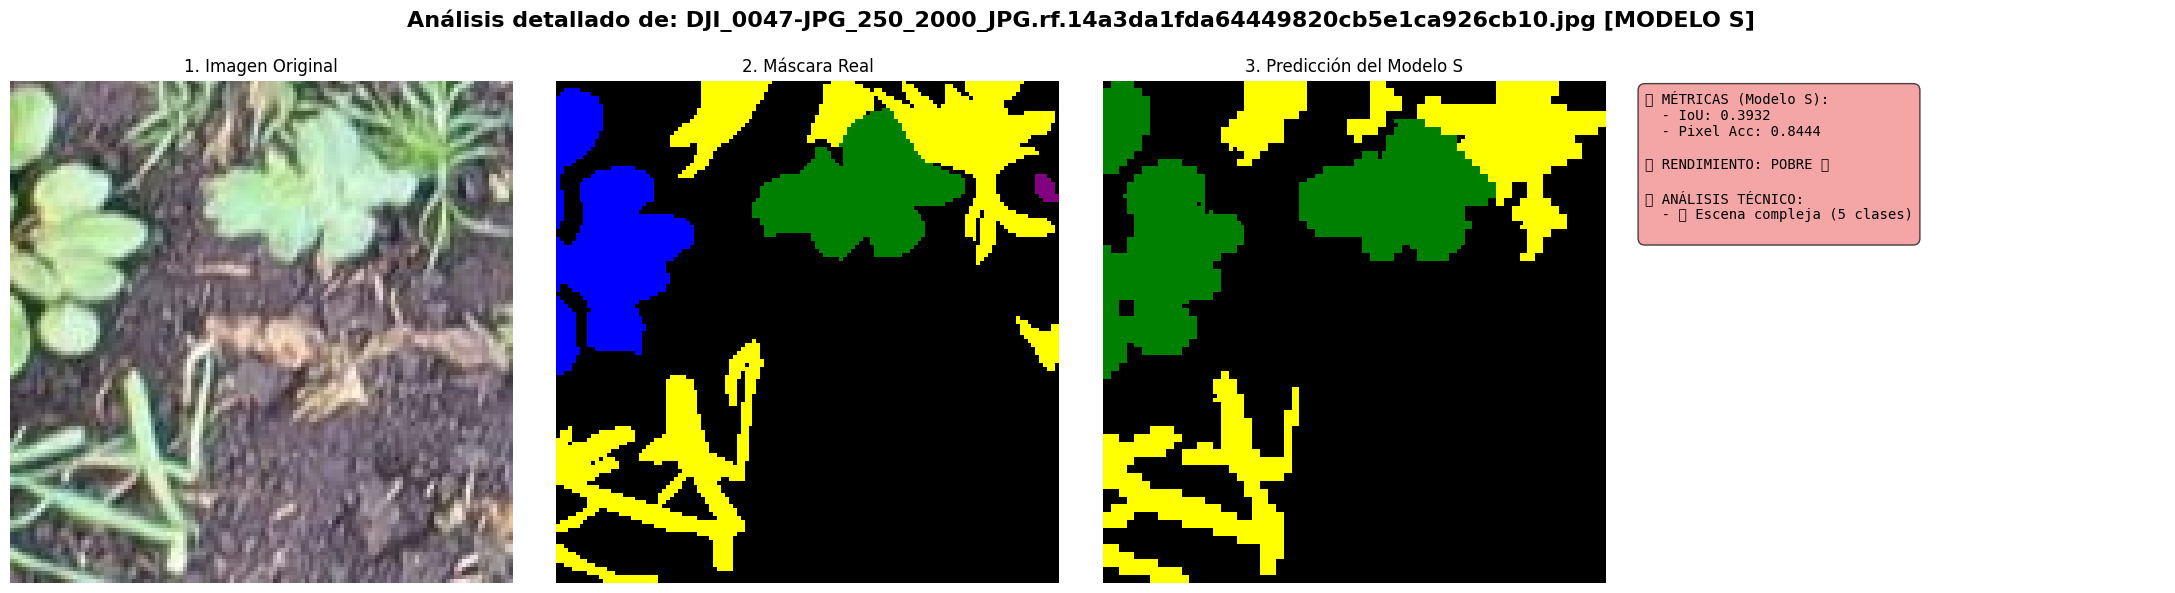

/tmp/ipython-input-2889150923.py:193: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


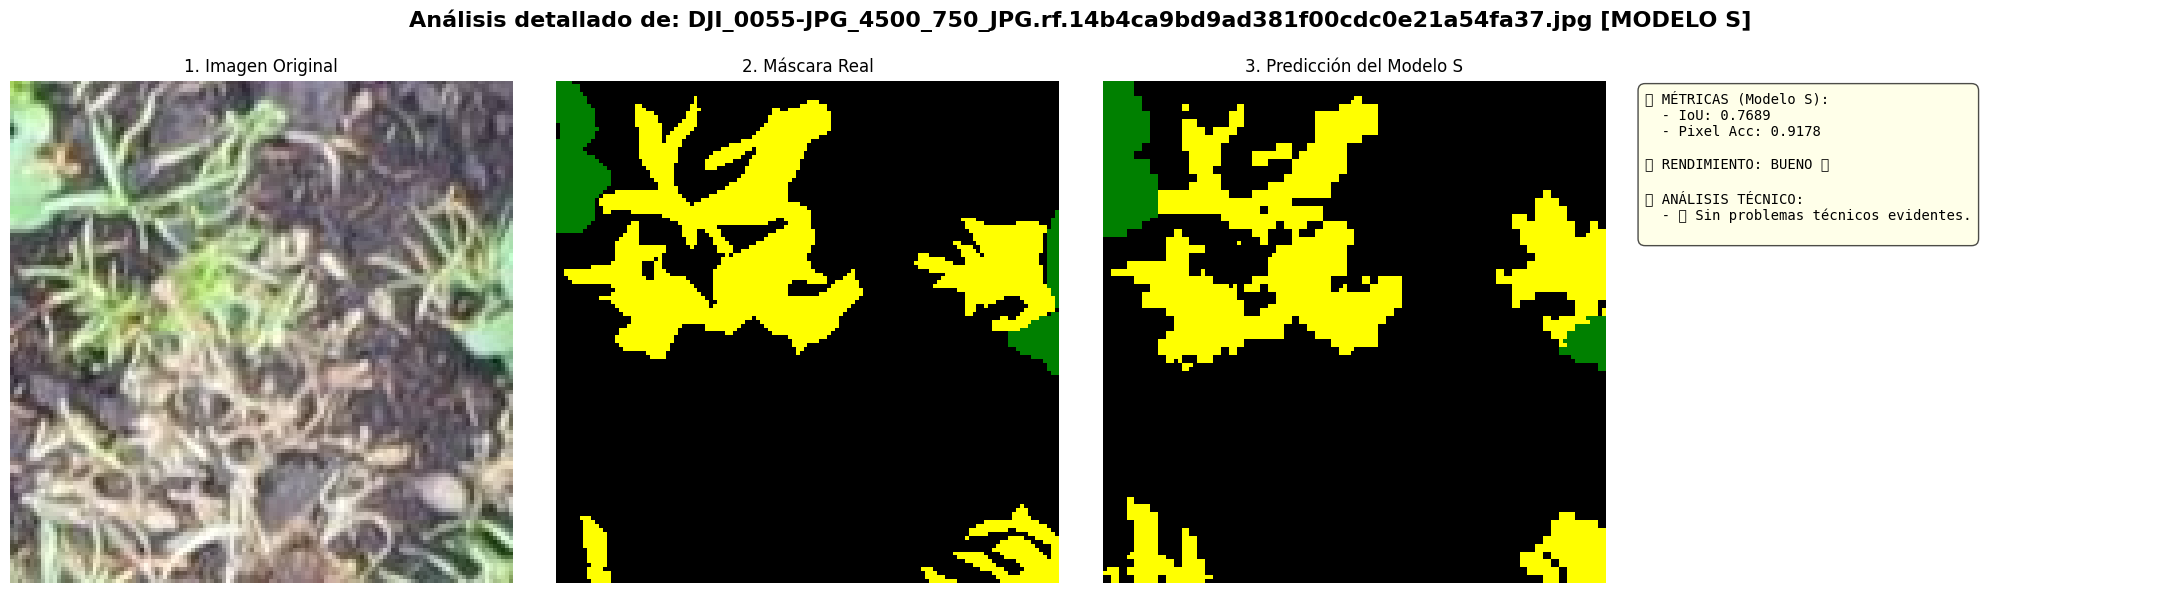

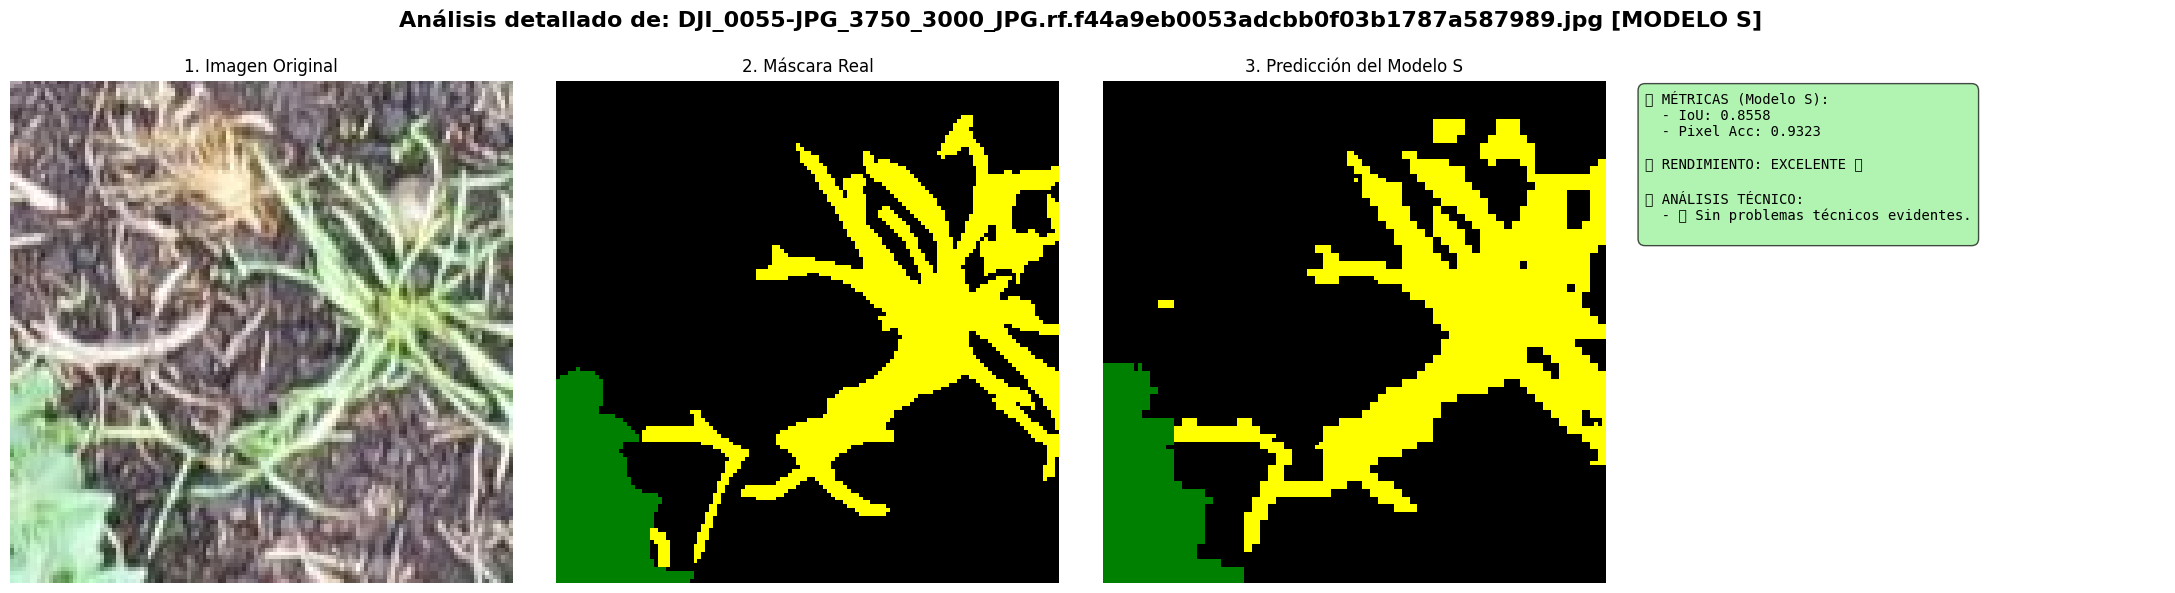

🏁 Análisis finalizado.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
import cv2

# --- 1. CONFIGURACIÓN PRINCIPAL ---
MODEL_PATH = 'efficient_weed_model_S_best.keras' # <--- CAMBIO AQUÍ
BASE_PATH = './Balanced'
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 6

# =================================================================
#  ✅ ¡AQUÍ! Edita esta lista con los nombres de archivo exactos
#       de las imágenes complejas que quieres analizar.
# =================================================================
IMAGES_TO_ANALYZE = [
    '5-447m3_jpg.rf.173afa42e9cad331ef874ddf53978811.jpg', # Ejemplo 1
    '5-271m3_jpg.rf.32d46d50648d759f9351cfda0388b928.jpg', # Ejemplo 2
    'DJI_0050-JPG_1500_1250_JPG.rf.1799fec20005683b68c52fb941f18059.jpg',
    'DJI_0047-JPG_250_2000_JPG.rf.14a3da1fda64449820cb5e1ca926cb10.jpg',
    'DJI_0055-JPG_4500_750_JPG.rf.14b4ca9bd9ad381f00cdc0e21a54fa37.jpg',
    'DJI_0055-JPG_3750_3000_JPG.rf.f44a9eb0053adcbb0f03b1787a587989.jpg',
    # Puedes añadir más nombres de archivo aquí
]
# =================================================================

# Nombres y colores (estos se mantienen igual para ambos modelos)
CLASS_NAMES = ['Background', 'Cow-tongue', 'Dandelion', 'Kikuyo', 'Other', 'Potato']
CLASS_COLORS = [
    [0/255, 0/255, 0/255],          # 0: Background - Negro
    [0/255, 0/255, 255/255],        # 1: Cow-tongue - Azul
    [255/255, 165/255, 0/255],      # 2: Dandelion  - Naranja
    [255/255, 255/255, 0/255],      # 3: Kikuyo     - Amarillo
    [128/255, 0/255, 128/255],      # 4: Other      - Púrpura
    [0/255, 128/255, 0/255]         # 5: Potato     - Verde
]

# --- 2. DEFINICIONES DE CAPAS PERSONALIZADAS DEL MODELO ---
class ASPPModule(layers.Layer):
    # ... (El código de esta clase no cambia)
    def __init__(self, filters=192, **kwargs):
        super(ASPPModule, self).__init__(**kwargs)
        self.filters = filters
        self.conv_1x1 = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1 = layers.BatchNormalization()
        self.relu_1x1 = layers.ReLU()
        self.conv_3x3_6 = layers.Conv2D(filters, 3, padding='same', dilation_rate=6, use_bias=False)
        self.bn_3x3_6 = layers.BatchNormalization()
        self.relu_3x3_6 = layers.ReLU()
        self.conv_3x3_12 = layers.Conv2D(filters, 3, padding='same', dilation_rate=12, use_bias=False)
        self.bn_3x3_12 = layers.BatchNormalization()
        self.relu_3x3_12 = layers.ReLU()
        self.conv_3x3_18 = layers.Conv2D(filters, 3, padding='same', dilation_rate=18, use_bias=False)
        self.bn_3x3_18 = layers.BatchNormalization()
        self.relu_3x3_18 = layers.ReLU()
        self.global_avg_pool = layers.GlobalAveragePooling2D(keepdims=True)
        self.conv_1x1_gap = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1_gap = layers.BatchNormalization()
        self.relu_1x1_gap = layers.ReLU()
        self.conv_final = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_final = layers.BatchNormalization()
        self.relu_final = layers.ReLU()
        self.dropout = layers.Dropout(0.2)
    def call(self, inputs, training=None):
        input_shape = tf.shape(inputs)
        conv_1x1 = self.relu_1x1(self.bn_1x1(self.conv_1x1(inputs), training=training))
        conv_3x3_6 = self.relu_3x3_6(self.bn_3x3_6(self.conv_3x3_6(inputs), training=training))
        conv_3x3_12 = self.relu_3x3_12(self.bn_3x3_12(self.conv_3x3_12(inputs), training=training))
        conv_3x3_18 = self.relu_3x3_18(self.bn_3x3_18(self.conv_3x3_18(inputs), training=training))
        gap = self.global_avg_pool(inputs)
        gap = self.relu_1x1_gap(self.bn_1x1_gap(self.conv_1x1_gap(gap), training=training))
        gap = tf.image.resize(gap, [input_shape[1], input_shape[2]], method='bilinear')
        concat = layers.Concatenate()([conv_1x1, conv_3x3_6, conv_3x3_12, conv_3x3_18, gap])
        output = self.relu_final(self.bn_final(self.conv_final(concat), training=training))
        output = self.dropout(output, training=training)
        return output

class DeformableAttention(layers.Layer):
    # ... (El código de esta clase no cambia)
    def __init__(self, filters, **kwargs):
        super(DeformableAttention, self).__init__(**kwargs)
        self.filters = filters
    def build(self, input_shape):
        self.attention_conv = layers.Conv2D(self.filters, 1, padding='same', activation='sigmoid', name='attention_weights_conv', use_bias=False)
        self.bn_attention = layers.BatchNormalization()
        self.feature_conv = layers.SeparableConv2D(self.filters, 3, padding='same', name='feature_processing_conv', use_bias=False)
        self.bn_feature = layers.BatchNormalization()
        self.relu_feature = layers.ReLU()
        super(DeformableAttention, self).build(input_shape)
    def call(self, inputs, training=None):
        attention_weights = self.bn_attention(self.attention_conv(inputs), training=training)
        features = self.relu_feature(self.bn_feature(self.feature_conv(inputs), training=training))
        attended_features = features * attention_weights
        return attended_features

# Funciones dummy para cargar el modelo
def dice_coefficient(y_true, y_pred, smooth=1e-6): return 0.0
def iou_metric(y_true, y_pred): return 0.0
def combined_loss(y_true, y_pred): return 0.0

# --- 3. FUNCIONES DE CARGA Y ANÁLISIS ---
def load_and_preprocess_image(image_path, mask_path):
    # ... (Esta función no cambia)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')
    return image, mask

def analyze_prediction_issues(image_np, true_mask_np, pred_logits):
    # ... (Esta función no cambia)
    issues = []
    pred_mask_np = np.argmax(pred_logits, axis=-1)
    unique_classes_true = len(np.unique(true_mask_np))
    if unique_classes_true > 4:
        issues.append(f"🔬 Escena compleja ({unique_classes_true} clases)")
    if image_np.max() <= 1.0:
        gray_img = cv2.cvtColor((image_np * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    else:
        gray_img = cv2.cvtColor(image_np.astype(np.uint8), cv2.COLOR_RGB2GRAY)
    contrast = np.std(gray_img)
    laplacian_var = cv2.Laplacian(gray_img, cv2.CV_64F).var()
    if contrast < 35: issues.append("📉 Bajo contraste en imagen")
    if laplacian_var < 80: issues.append("🌫️ Imagen algo borrosa")
    prediction_confidence = np.max(pred_logits, axis=-1)
    low_confidence_pixels = np.sum(prediction_confidence < 0.75) / (IMG_HEIGHT * IMG_WIDTH)
    if low_confidence_pixels > 0.2:
        issues.append(f"🤔 Modelo con baja confianza ({low_confidence_pixels*100:.1f}% de píxeles)")
    num_true_objects = 0
    for class_id in range(1, NUM_CLASSES):
        class_mask = (true_mask_np == class_id).astype(np.uint8)
        if np.sum(class_mask) > 0:
            _, labels = cv2.connectedComponents(class_mask)
            num_objects = len(np.unique(labels)) - 1
            num_true_objects += num_objects
    if num_true_objects > 10:
        issues.append(f"🧩 Alta fragmentación ({num_true_objects} objetos)")
    if not issues:
        issues.append("✅ Sin problemas técnicos evidentes.")
    return issues

# --- 4. FUNCIÓN DE VISUALIZACIÓN ---
def plot_detailed_analysis(image, true_mask, pred_mask, iou, pixel_acc, issues, filename):
    # ... (Los títulos se actualizan para el Modelo S)
    custom_cmap = ListedColormap(CLASS_COLORS)
    fig, axes = plt.subplots(1, 4, figsize=(22, 6))

    # <--- CAMBIO AQUÍ EN EL TÍTULO
    plt.suptitle(f"Análisis detallado de: {os.path.basename(filename)} [MODELO S]", fontsize=16, fontweight='bold')

    axes[0].imshow(image.astype('uint8'))
    axes[0].set_title("1. Imagen Original", fontsize=12)
    axes[0].axis('off')

    axes[1].imshow(true_mask, cmap=custom_cmap, vmin=0, vmax=NUM_CLASSES-1)
    axes[1].set_title("2. Máscara Real", fontsize=12)
    axes[1].axis('off')

    # <--- CAMBIO AQUÍ EN EL TÍTULO
    axes[2].imshow(pred_mask, cmap=custom_cmap, vmin=0, vmax=NUM_CLASSES-1)
    axes[2].set_title("3. Predicción del Modelo S", fontsize=12)
    axes[2].axis('off')

    axes[3].axis('off')

    if iou > 0.85: performance = "EXCELENTE ✅"
    elif iou > 0.70: performance = "BUENO 👍"
    elif iou > 0.50: performance = "REGULAR ⚠️"
    else: performance = "POBRE ❌"

    analysis_text = f"📊 MÉTRICAS (Modelo S):\n" # <--- CAMBIO AQUÍ
    analysis_text += f"  - IoU: {iou:.4f}\n"
    analysis_text += f"  - Pixel Acc: {pixel_acc:.4f}\n\n"
    analysis_text += f"⭐ RENDIMIENTO: {performance}\n\n"
    analysis_text += f"🔍 ANÁLISIS TÉCNICO:\n"
    for issue in issues[:4]:
        analysis_text += f"  - {issue}\n"

    if iou > 0.85: bg_color = "lightgreen"
    elif iou > 0.70: bg_color = "lightyellow"
    else: bg_color = "lightcoral"

    axes[3].text(0.02, 0.98, analysis_text, transform=axes[3].transAxes,
                   fontsize=10, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle="round,pad=0.5", facecolor=bg_color, alpha=0.7))

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- 5. FUNCIÓN PRINCIPAL DE EJECUCIÓN ---
def main_analysis():
    # ... (Los textos se actualizan para el Modelo S)
    print("="*80)
    print("🔬 ANÁLISIS EN PROFUNDIDAD DE IMÁGENES SELECCIONADAS (MODELO S)") # <--- CAMBIO AQUÍ
    print("="*80)

    custom_objects = {
        'ASPPModule': ASPPModule, 'DeformableAttention': DeformableAttention,
        'combined_loss': combined_loss, 'dice_coefficient': dice_coefficient, 'iou_metric': iou_metric
    }
    try:
        model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)
        print(f"✅ Modelo '{MODEL_PATH}' cargado exitosamente.")
    except Exception as e:
        print(f"❌ Error fatal: No se pudo cargar el modelo. Revisa la ruta y las capas personalizadas. Error: {e}")
        return

    test_images_dir = os.path.join(BASE_PATH, 'test/images')
    test_masks_dir = os.path.join(BASE_PATH, 'test/masks')

    image_paths_to_process = []
    for filename in IMAGES_TO_ANALYZE:
        img_path = os.path.join(test_images_dir, filename)
        base_name = os.path.splitext(filename)[0]
        mask_filename = base_name + '_mask.png'
        mask_path = os.path.join(test_masks_dir, mask_filename)

        if os.path.exists(img_path) and os.path.exists(mask_path):
            image_paths_to_process.append((img_path, mask_path))
        else:
            print(f"⚠️  Advertencia: No se encontró la imagen '{img_path}' o su máscara '{mask_path}'. Se omitirá.")

    if not image_paths_to_process:
        print("❌ No se procesará ninguna imagen. Verifica los nombres en la lista 'IMAGES_TO_ANALYZE'.")
        return

    print(f"\n▶️  Iniciando análisis para {len(image_paths_to_process)} imagen(es) seleccionada(s)...\n")

    for img_path, mask_path in image_paths_to_process:
        image_tensor, mask_tensor = load_and_preprocess_image(img_path, mask_path)
        image_for_model = tf.keras.applications.efficientnet_v2.preprocess_input(tf.cast(image_tensor, tf.float32))
        pred_logits = model.predict(tf.expand_dims(image_for_model, 0), verbose=0)[0]
        pred_mask = tf.argmax(pred_logits, axis=-1)
        image_np = image_tensor.numpy()
        true_mask_np = mask_tensor.numpy().squeeze()
        pred_mask_np = pred_mask.numpy()
        iou = tf.keras.metrics.MeanIoU(num_classes=NUM_CLASSES)
        iou.update_state(true_mask_np, pred_mask_np)
        iou_score = iou.result().numpy()
        pixel_accuracy = np.sum(true_mask_np == pred_mask_np) / (IMG_HEIGHT * IMG_WIDTH)
        issues = analyze_prediction_issues(image_np, true_mask_np, pred_logits)
        plot_detailed_analysis(image_np, true_mask_np, pred_mask_np, iou_score, pixel_accuracy, issues, img_path)

    print("🏁 Análisis finalizado.")

# --- 6. EJECUCIÓN DEL SCRIPT ---
if __name__ == "__main__":
    main_analysis()